In [1]:
import random 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
sess = tf.Session()
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
train_size = 1000
test_size = 102
rand_train_indices = np.random.choice(len(mnist.train.images), train_size, replace=False)
rand_test_indices = np.random.choice(len(mnist.test.images), test_size, replace=False)
x_vals_train = mnist.train.images[rand_train_indices]
x_vals_test = mnist.test.images[rand_test_indices]
y_vals_train = mnist.train.labels[rand_train_indices]
y_vals_test = mnist.test.labels[rand_test_indices]

k = 4
batch_size = 6

In [10]:
#initialize placeholders etc.
x_data_train = tf.placeholder(dtype=tf.float32, shape=[None, 784])
x_data_test = tf.placeholder(dtype=tf.float32, shape=[None,784])
y_target_train = tf.placeholder(dtype=tf.float32, shape=[None,10])
y_target_test = tf.placeholder(dtype=tf.float32, shape=[None,10])

In [16]:
#declare the distance metric. (L1)
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test,1))), reduction_indices=2)

In [17]:
#Now find the top k images that are the closest and predict the mode. The mode will be performed on one hot encoded
#indices and counting which occurs the most.

# Predict: Get min distance index (Nearest neighbor)
top_k_xvals, top_k_indices = tf.nn.top_k(tf.neg(distance), k=k)
prediction_indices = tf.gather(y_target_train, top_k_indices)
# Predict the mode category
count_of_predictions = tf.reduce_sum(prediction_indices, reduction_indices=1)
prediction = tf.argmax(count_of_predictions, dimension=1)

In [21]:
num_loops = int(np.ceil(len(x_vals_test)/batch_size))

test_output = []
actual_vals = []
for i in range(num_loops):
    min_index = i*batch_size
    max_index = min((i+1)*batch_size,len(x_vals_train))
    x_batch = x_vals_test[min_index:max_index]
    y_batch = y_vals_test[min_index:max_index]
    predictions = sess.run(prediction, feed_dict={x_data_train: x_vals_train, x_data_test: x_batch,
                                         y_target_train: y_vals_train, y_target_test: y_batch})
    test_output.extend(predictions)
    actual_vals.extend(np.argmax(y_batch, axis=1))

In [22]:
#Now that we have saved the actual and predicted output, we can calculate the accuracy. This will change due to our random
#sampling of the test/training datasets, but we should end up with accuracies around 80% to 90%
accuracy = sum([1./test_size for i in range(test_size) if test_output[i]==actual_vals[i]])
print('Accuracy on test set: ' + str(accuracy))

Accuracy on test set: 0.8529411764705873


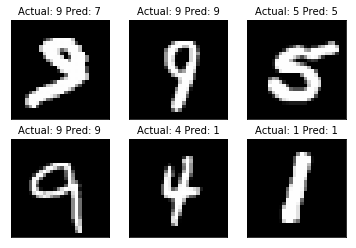

In [26]:
#plot
actuals = np.argmax(y_batch, axis=1)
Nrows = 2
Ncols = 3
for i in range(len(actuals)):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(np.reshape(x_batch[i], [28,28]),cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred: '  + str(predictions[i]), fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)